In [68]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [69]:
IMG_SIZE = 70
path = r"C:\Users\PRATIK\Desktop\Groomup\Cosine check\new_celeb_all"

arrays = []
img_names = []
for img in os.listdir(path):
    img1 = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  #reading in one image at a time
    new_array1 = cv2.resize(img1, (IMG_SIZE, IMG_SIZE))
    length = np.prod(new_array1.shape)
    new_array1 = new_array1.reshape(length)
    img_names.append(img)
    arrays.append(new_array1)
    
X = np.array(arrays)
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
labels = kmeans.labels_

In [70]:
lst = {}
for i in range(len(img_names)):
    if labels[i] not in lst:
        lst[labels[i]] = []
    lst[labels[i]].append(img_names[i])

In [71]:
centers = kmeans.cluster_centers_

In [72]:
for i in range(len(lst)):
    print(i, ' : ', len(lst[i]))

0  :  48
1  :  19
2  :  34
3  :  42
4  :  24
5  :  47



TEST IMAGE: duplicate_srk.jpg



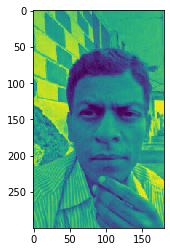


CLUSTER NUMBER: 4



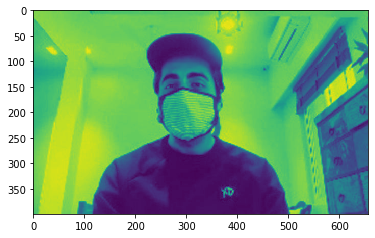

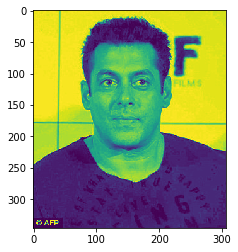

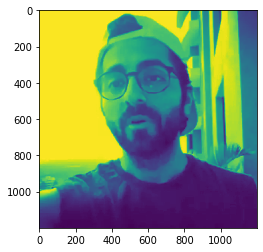

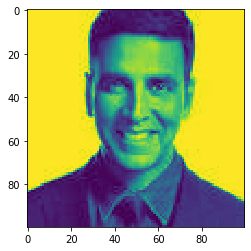

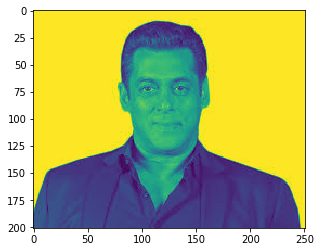

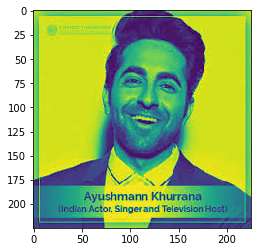

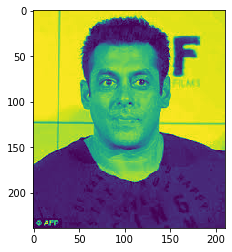

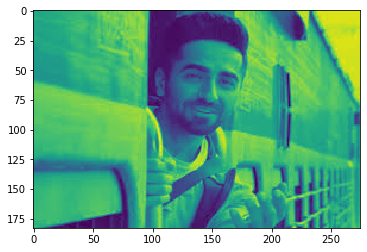

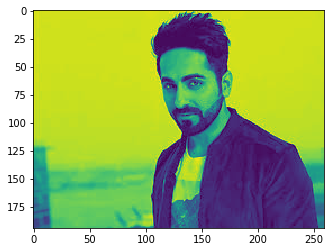

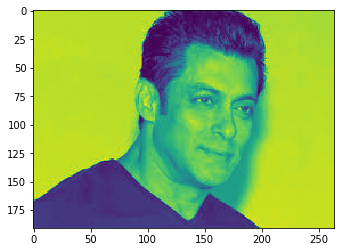

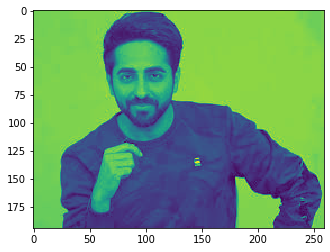

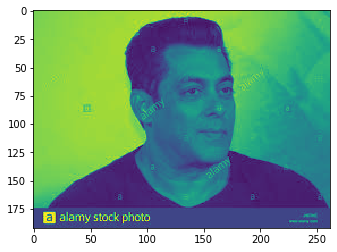

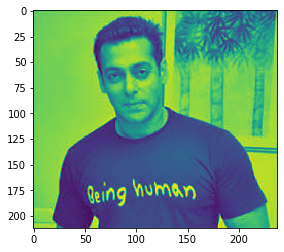

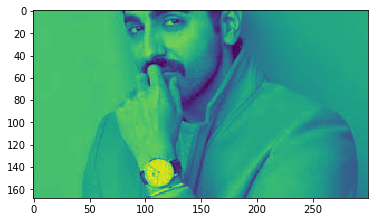

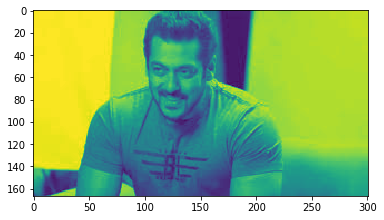

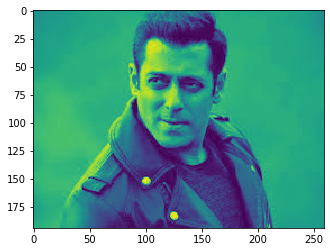

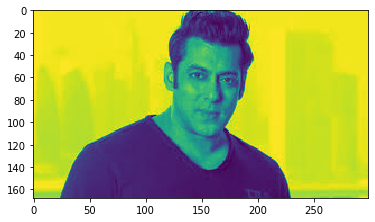

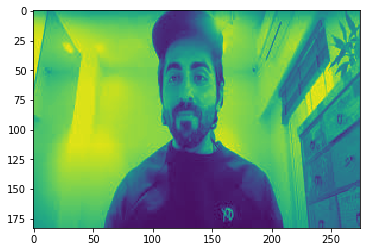

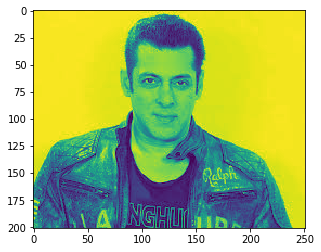

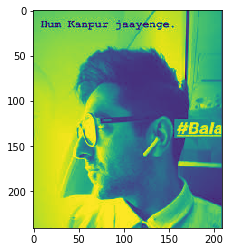

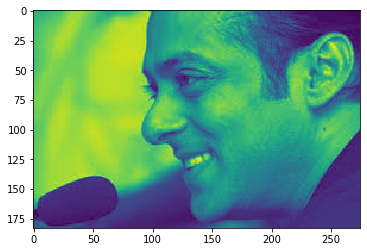

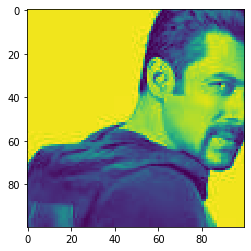

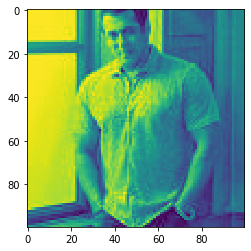

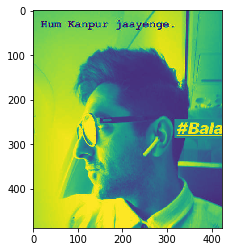


TEST IMAGE: new.jpg



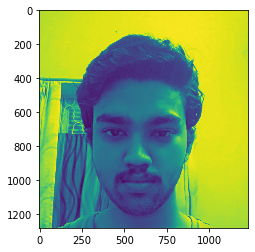


CLUSTER NUMBER: 1



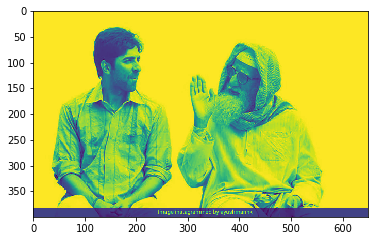

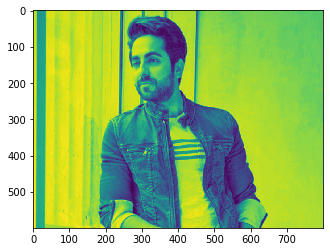

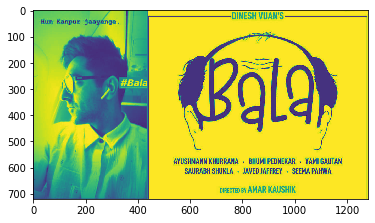

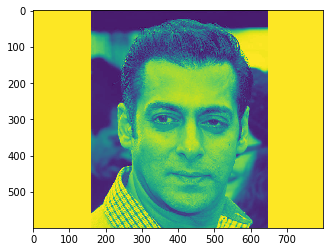

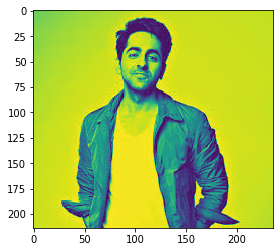

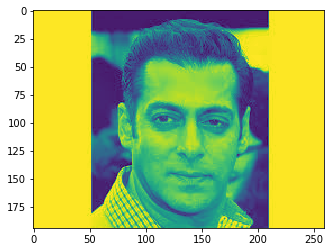

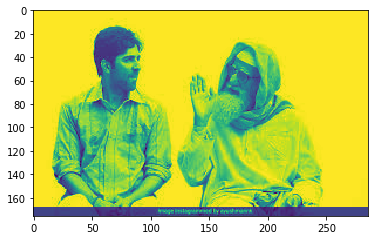

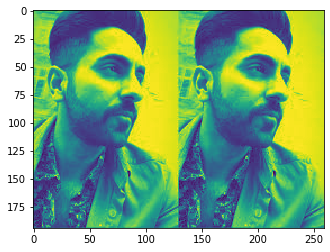

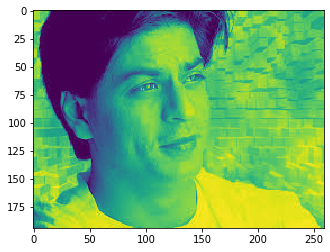

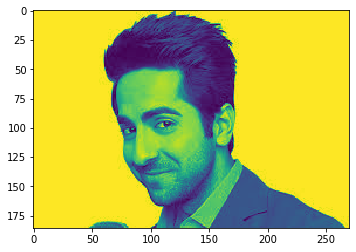

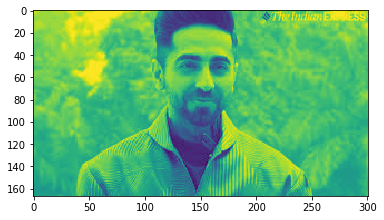

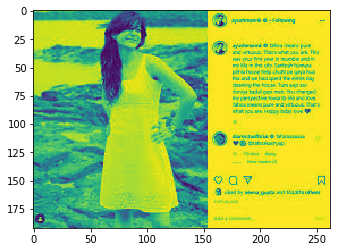

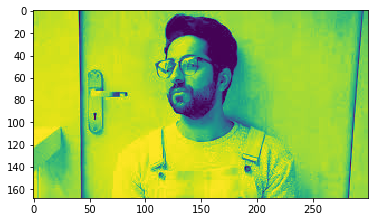

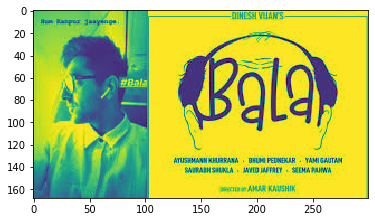

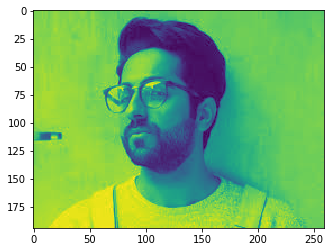

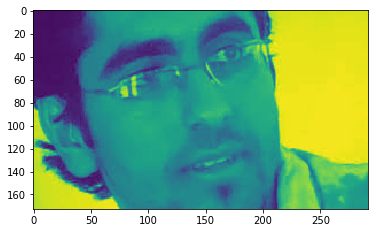

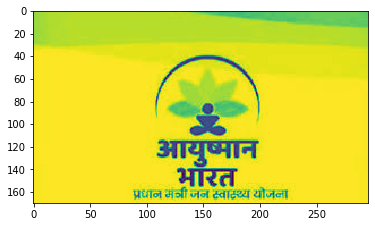

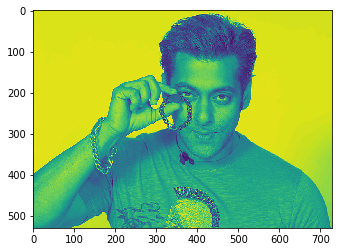

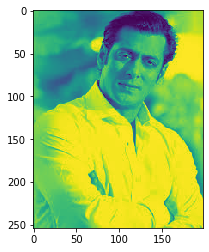


TEST IMAGE: srk1.jpg



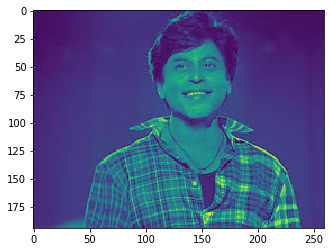


CLUSTER NUMBER: 0



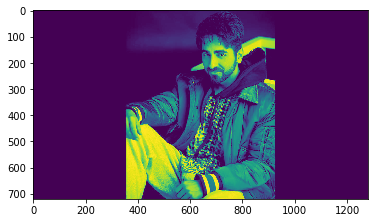

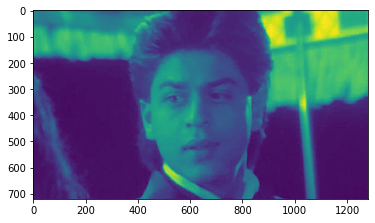

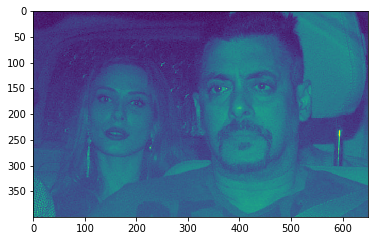

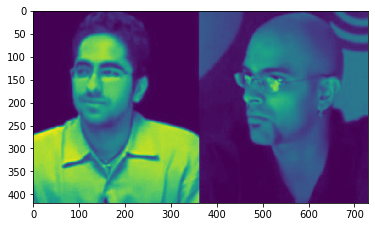

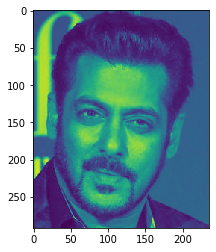

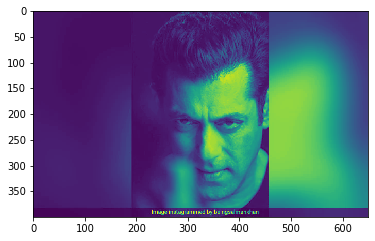

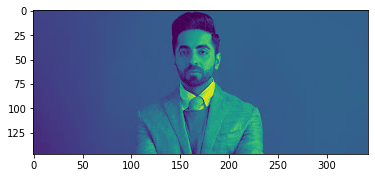

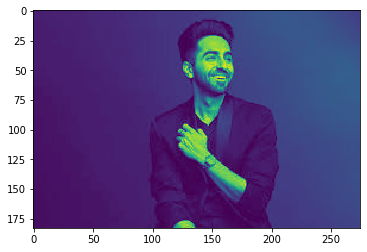

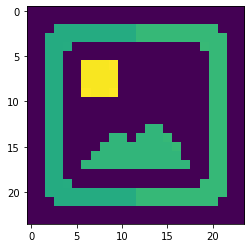

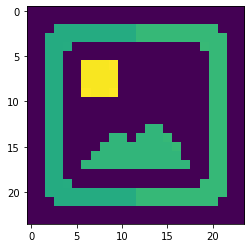

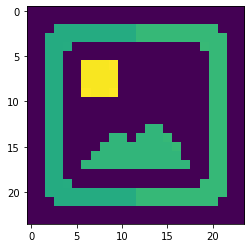

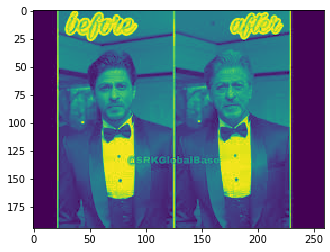

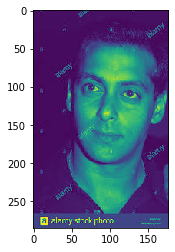

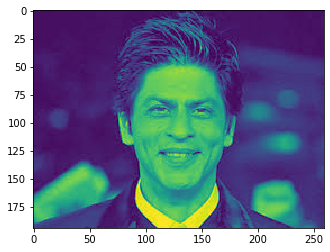

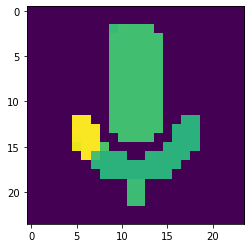

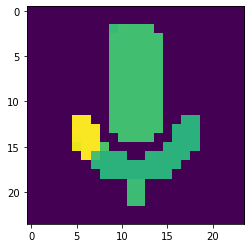

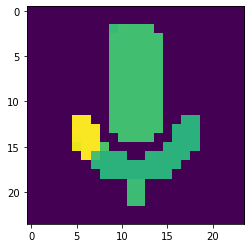

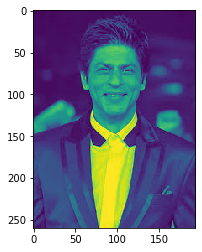

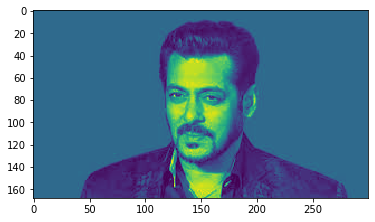

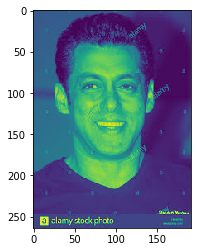

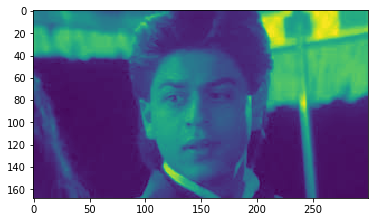

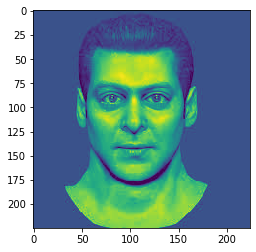

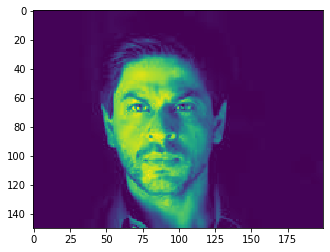

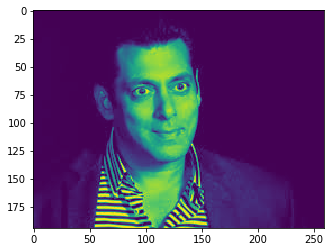

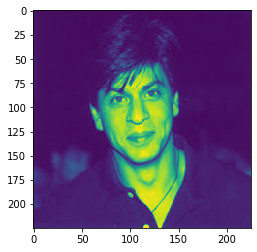

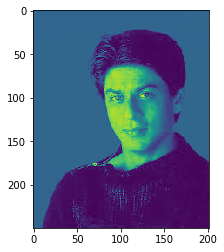

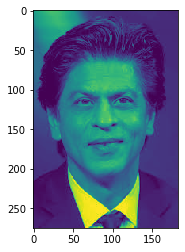

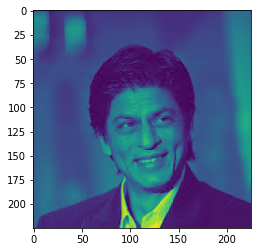

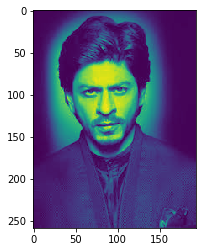

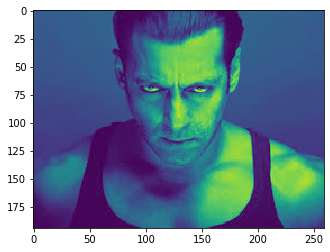

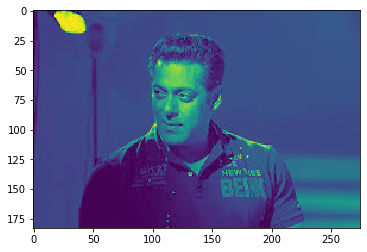

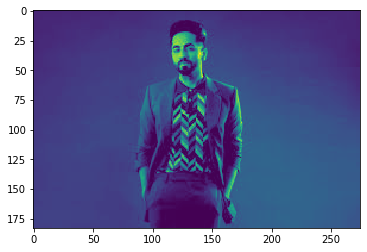

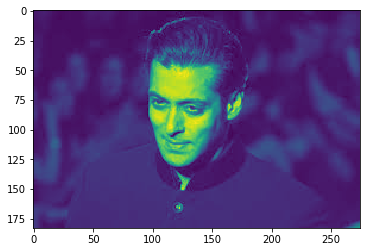

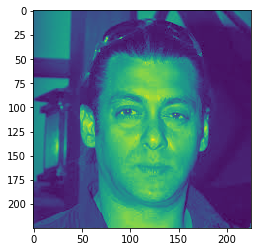

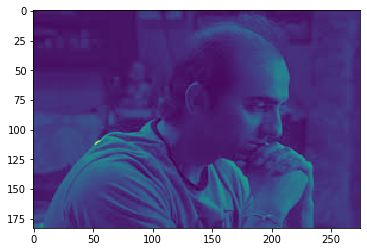

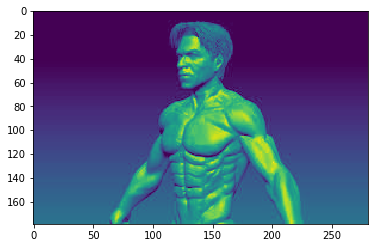

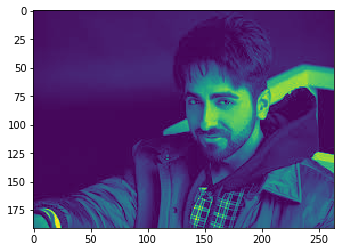

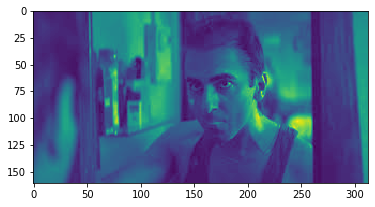

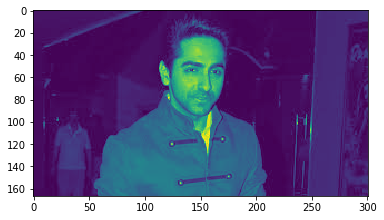

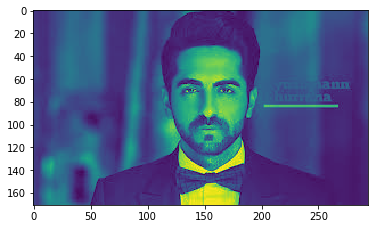

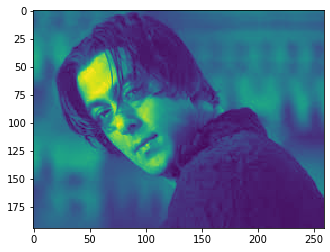

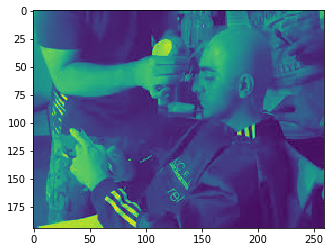

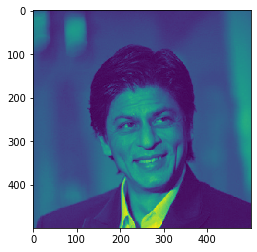

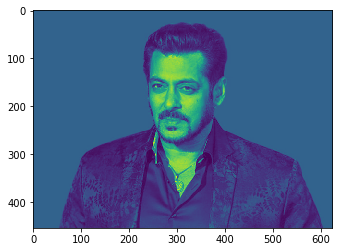

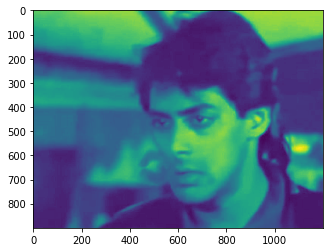

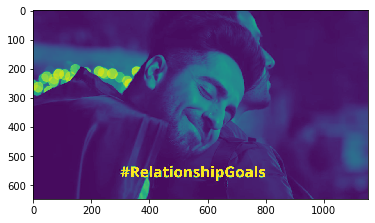

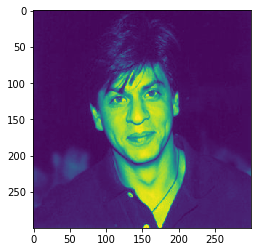

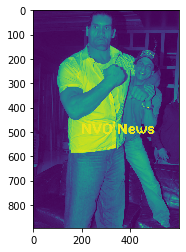

In [74]:
IMG_SIZE = 70
path1 = r"C:\Users\PRATIK\Desktop\Groomup\Cosine check\check"

for img in os.listdir(path1):
    img1 = cv2.imread(os.path.join(path1,img), cv2.IMREAD_GRAYSCALE)
    new_array1 = cv2.resize(img1, (IMG_SIZE, IMG_SIZE))
    length = np.prod(new_array1.shape)
    new_array1 = new_array1.reshape(length)
    print('\nTEST IMAGE: {}\n'.format(img))
    plt.imshow(img1)
    plt.show()
    dist = []
    
    for i in range(len(centers)):
        dist.append(distance.euclidean(centers[i], new_array1))
    print('\nCLUSTER NUMBER: {}\n'.format(dist.index(min(dist))))
    for img in os.listdir(path):
        if img in lst[dist.index(min(dist))]:
            img1 = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img1)
            plt.show()